In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

cifar10 = tf.keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [2]:
len(train_images)

50000

In [3]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [4]:
train_images

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [5]:
len(train_labels)

50000

In [6]:
train_images.shape

(50000, 32, 32, 3)

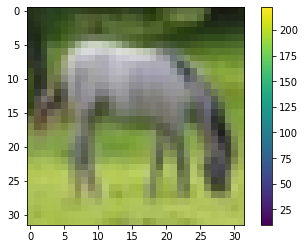

In [8]:
plt.figure()
plt.imshow(train_images[87])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
train_images = train_images / 255.0
test_images = test_images / 255.0

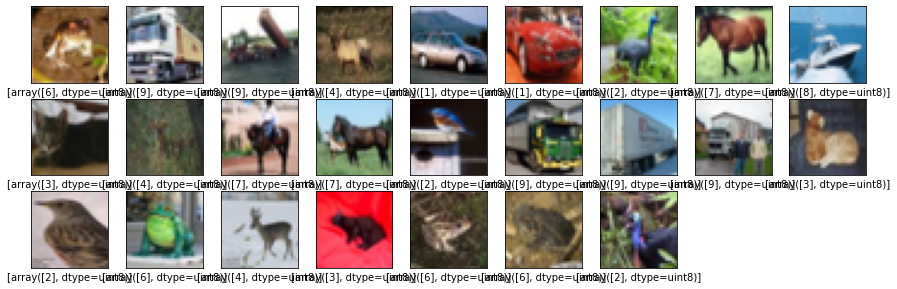

In [17]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(9,9,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel([train_labels[i]])
plt.show()

In [18]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128)
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 23s 14ms/step - loss: 1.5566 - accuracy: 0.4360
Epoch 2/5
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1250 - accuracy: 0.6052
Epoch 3/5
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9795 - accuracy: 0.6586
Epoch 4/5
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8880 - accuracy: 0.6888
Epoch 5/5
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8260 - accuracy: 0.7092


In [21]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.8370 - accuracy: 0.7057

Test accuracy: 0.7056999802589417


In [22]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [23]:
predictions = probability_model.predict(test_images)

In [24]:
np.argmax(predictions[0])

3

In [25]:
test_labels[0]

array([3], dtype=uint8)

In [33]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(32, 32, 3)


In [34]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 32, 32, 3)


In [35]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.81416608e-03 8.68641138e-02 6.49551112e-06 1.95525517e-05
  1.60451657e-06 2.55830946e-06 8.84368001e-06 6.87180659e-07
  9.08243001e-01 3.03885178e-03 4.78785966e-15 7.61852985e-16
  2.84037439e-14 3.67362899e-14 6.54497742e-15 3.16616511e-14
  5.64449119e-15 4.83447917e-14 4.17294000e-15 2.60449481e-15
  7.59253822e-15 6.73156988e-15 1.86481774e-14 5.49546802e-15
  2.71075764e-15 1.98153211e-14 8.42462019e-15 8.98720846e-15
  1.12881904e-14 1.81041646e-15 1.69232948e-14 4.53715443e-15
  1.22679475e-14 3.34069456e-14 1.33524410e-14 1.94201912e-15
  4.06340382e-15 3.69310134e-15 1.29723731e-14 3.20226375e-15
  3.42479773e-15 1.16722690e-14 1.06918072e-14 1.91813512e-15
  3.02735822e-15 1.71957006e-14 1.88285937e-14 1.74477793e-14
  1.24244495e-14 5.82164516e-15 2.46039998e-14 5.58993549e-15
  9.17614932e-15 2.32717601e-15 3.16750469e-15 1.27348176e-14
  3.07487952e-15 4.59752713e-14 2.34253124e-15 2.19054557e-15
  6.54370433e-15 7.53638417e-15 1.62275408e-15 9.43455112e-15
  1.5359